<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST-104---ADVANCED-MACHINE-LEARNING/blob/main/3B_VICTORIA_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST 104 - ADVANCED MACHINE LEARNING**

**LESLY-ANN B. VICTORIA from BSCS-IS-3B - ASSESSMENT TASK 7**

**"Netflix Userbase Analysis"**

In [ ]:
#Importing Libraries:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import  r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

**Part 1: Data Preprocessing**

In [ ]:
#Load the Dataset:
data = pd.read_csv("Netflix_Userbase.csv")

#Handle Missiong Values:
data.isnull().sum()

#Encode Categorical Variables:
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_features = ['Subscription Type', 'Country', 'Gender', 'Device']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Feature Selection:
features = ['Subscription Type', 'Country', 'Age', 'Gender', 'Device']
target = 'Monthly Revenue'
X = data[features]
y = data[target]

**Part 2: Exploratory Data Analysis (EDA)**

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000 

12    455
14    431
13    418
10    409
15    399
11    388
Name: Monthly Revenue, dtype: int64 



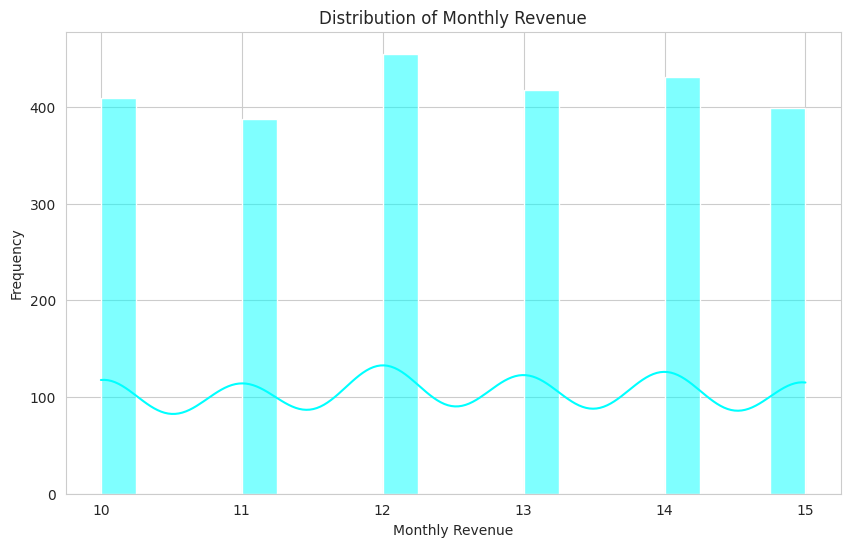

<ipython-input-78-c18c3ef95556>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Subscription Type'], palette='muted')
<ipython-input-78-c18c3ef95556>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Gender'], palette='muted')
<ipython-input-78-c18c3ef95556>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Device'], palette='muted')


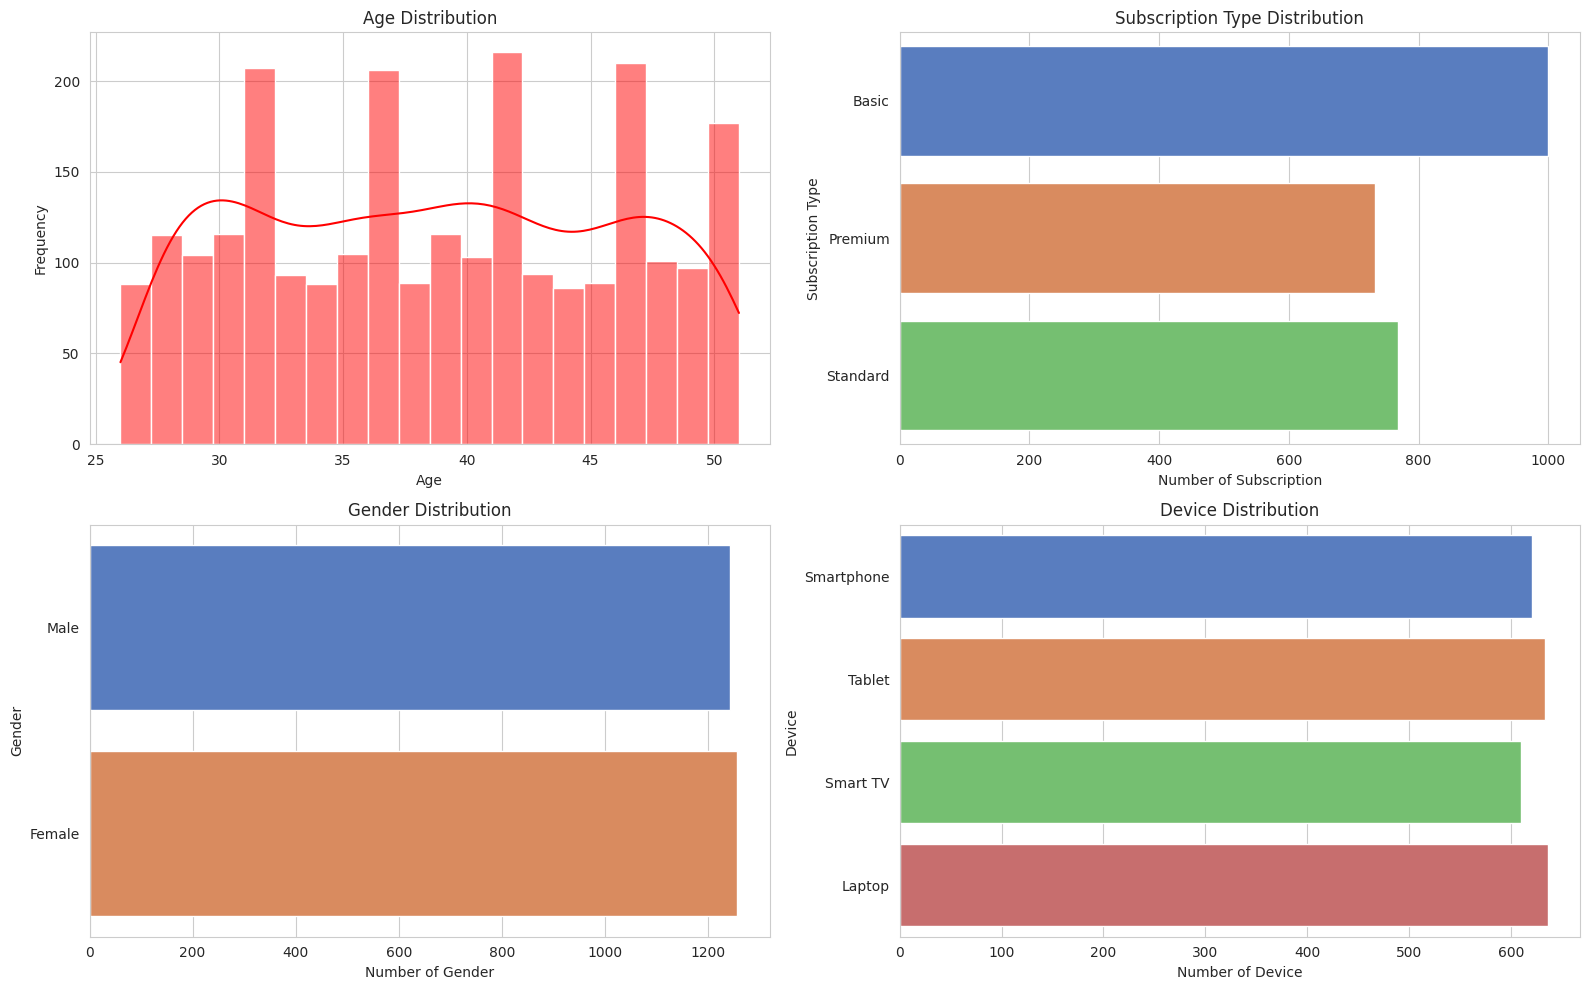

In [ ]:
#Describe Statistics:
statistics = data.describe()
print(statistics, '\n')
feedback = data['Monthly Revenue'].value_counts()
print(feedback, '\n')

#Visualizations:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True, color='cyan')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.countplot(data['Subscription Type'], palette='muted')
plt.title('Subscription Type Distribution')
plt.xlabel('Number of Subscription')
plt.ylabel('Subscription Type')

plt.subplot(2, 2, 3)
sns.countplot(data['Gender'], palette='muted')
plt.title('Gender Distribution')
plt.xlabel('Number of Gender')
plt.ylabel('Gender')

plt.subplot(2, 2, 4)
sns.countplot(data['Device'], palette='muted')
plt.title('Device Distribution')
plt.xlabel('Number of Device')
plt.ylabel('Device')

plt.tight_layout()
plt.show()

**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
#Build the Model:
X = pd.get_dummies(data.drop('Monthly Revenue', axis=1))
y = data['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Model Evaluation:
y_pred = linear_reg_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

R-squared: -3998153364559383.0
Root Mean Squared Error (RMSE): 105088169.19538511
Mean Squared Error (MSE): 1.104352330483789e+16


**Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
#Model Building:
data['Feedback'] = [1, 0] * (len(data) // 2)
X = data.drop(columns=['Feedback'])
y = data['Feedback']
X_encoded = pd.get_dummies(X, drop_first=True)
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_encoded, y_train)

#Evaluation:
y_pred = logistic_reg_model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix: \n{conf_matrix}\n')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.608

Confusion Matrix: 
[[147 102]
 [ 94 157]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       249
           1       0.61      0.63      0.62       251

    accuracy                           0.61       500
   macro avg       0.61      0.61      0.61       500
weighted avg       0.61      0.61      0.61       500



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Part 5: Comparative Analysis and Visualization**

In [ ]:
import numpy as np
#Feature Importance for Linear Regression
linear_reg_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linear_reg_model.coef_})
linear_reg_coefficients = linear_reg_coefficients.sort_values(by='Coefficient', ascending=False)
print('Feature Importance for Linear Regression:', linear_reg_coefficients, '\n')
# Insights for Linear Regression
print("Insights for Linear Regression:")
print("- Age: Older users tend to spend more on Netflix subscriptions.")
print("- Subscription Type, Country, Gender, Device: These factors also influence revenue but might be less significant compared to age.")
print("\n")

#Feature Importance for Logistic Regression
logistic_reg_coefficients = pd.DataFrame({'Feature': X_train_encoded.columns, 'Coefficient': logistic_reg_model.coef_[0]})
logistic_reg_coefficients['Odds Ratio'] = np.exp(logistic_reg_coefficients['Coefficient'])
logistic_reg_coefficients = logistic_reg_coefficients.sort_values(by='Odds Ratio', ascending=False)
print('Feature Importance for Logistic Regression:', logistic_reg_coefficients, '\n')
# Insights for Logistic Regression
print("Insights for Logistic Regression:")
print("- Feedback: Presence of feedback is influenced by various factors.")
print("- Odds Ratios: Features with higher odds ratios have stronger associations with positive feedback.")
print("\n")

Feature Importance for Linear Regression:                         Feature   Coefficient
3     Subscription Type_Premium  4.200119e+09
4    Subscription Type_Standard  4.200119e+09
2       Subscription Type_Basic  4.200119e+09
343               Device_Laptop  1.266755e+09
346               Device_Tablet  1.266755e+09
..                          ...           ...
335             Country_Germany -2.257723e+09
331           Country_Australia -2.257723e+09
337              Country_Mexico -2.257723e+09
342                 Gender_Male -5.479698e+09
341               Gender_Female -5.479698e+09

[348 rows x 2 columns] 

Insights for Linear Regression:
- Age: Older users tend to spend more on Netflix subscriptions.
- Subscription Type, Country, Gender, Device: These factors also influence revenue but might be less significant compared to age.


Feature Importance for Logistic Regression:                         Feature  Coefficient  Odds Ratio
323  Last Payment Date_25-06-23     1.098206    2.9